X.shape (10, 60, 30)
y.shape (10, 36)


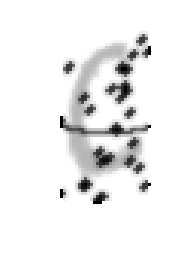

In [111]:
import random
import string

import cv2
import matplotlib.pyplot as plt
import numpy as np
from captcha.image import ImageCaptcha

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

characters = string.digits + string.ascii_uppercase

def batch_generate_captcha_mat(count, cnt=1, w=30, h=30):
    capt = ImageCaptcha(width=cnt * 34 + 26, height=60)
    mat_x = np.ndarray((count, w, h), dtype=np.uint8)
    mat_y = np.zeros((count, corpus_len), dtype=np.uint8)
    for i in range(0, count):
        cid = random.randint(0, corpus_len - 1)
        c = corpus[cid]
        capt_img = np.array(capt.generate_image(c))
        gray_img = cv2.cvtColor(capt_img, cv2.COLOR_RGB2GRAY)
        scle_img = cv2.resize(gray_img, (w, h))
        mat_x[i] = scle_img
        mat_y[i][cid] = 1.0
    return mat_x, mat_y

def captcha_generator(chars, batch=32, w=30, h=60):
    X = np.ndarray((batch, h, w), dtype=np.uint8)
    y = np.zeros((batch, len(chars)), dtype=np.uint8)

    print('X.shape', X.shape)
    print('y.shape', y.shape)
    generator = ImageCaptcha(width=width, height=height)
    for i in range(batch):
        char = random.choice(chars)
        idx = chars.find(char)
        capt_img = np.array(generator.generate_image(char))
        gray_img = cv2.cvtColor(capt_img, cv2.COLOR_RGB2GRAY)
        scle_img = cv2.resize(gray_img, (w, h))
        X[i] = scle_img
        y[i][idx] = 1.0

    return X, y

def show_img(img, zoom=4, dpi=80):
    w = img.shape[0]
    h = img.shape[1]
    plt.figure(figsize=(w*zoom/dpi, h*zoom/dpi), dpi=dpi)
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    return

train_X, train_y = captcha_generator(characters, 10, 30, 60)
show_img(train_X[0])


